In [4]:
import pandas as pd
import numpy as np
import nltk
import pickle
import os
from os import path
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
    d = path.dirname('E:/2016-2017fall/pcml/projects/ML_Project2_nsy/')
    doc_name = "./vocab_cut"
    text = open(path.join(d+doc_name+'.txt'))
    s = text.readline()
    if(s=="<user>\n"):
        print("yes")

yes


In [33]:
    d = path.dirname('E:/2016-2017fall/pcml/projects/ML_Project2_nsy/')
    doc_name = "./vocab_cut"
    text = open(path.join(d+doc_name+'.txt'))
    text1 = open(path.join(d+doc_name+'_.txt'),'w')
    
    s = text.readline()
    while(s):
        #token = s.split()
        # build token
        tokens= nltk.word_tokenize(s)
        # reduce short words
        tokens_not_short = [t for t in tokens if len(t) > 2]
        # reduce not-letter
        tokens_started_with_letter = [t for t in tokens_not_short if t[0].isalpha()]
        # remove stop words -- <user> <url>
        stop_words = set(stopwords.words('english'))
        local_stop = {"user", "url"}
        stop_words = stop_words | local_stop
        filtered_content = [w for w in tokens_started_with_letter if not w in stop_words]
        # stemming
        ps = PorterStemmer()
        stemmed_content = [ps.stem(word) for word in filtered_content]
        # lemmatization
        lemmatizer = WordNetLemmatizer()
        lemmatized_content = [lemmatizer.lemmatize(word) for word in stemmed_content]
        word = " ".join(lemmatized_content)
        text1.write(word+'\n')
        s = text.readline()

In [2]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

In [18]:
tokens= nltk.word_tokenize(text)
len(tokens)

110051

In [19]:
tokens_not_short = [t for t in tokens if len(t) > 2]
tokens_started_with_letter = [t for t in tokens_not_short if t[0].isalpha()]
len(tokens_started_with_letter)

92370

In [20]:
stop_words = set(stopwords.words('english'))
local_stop = {"re", "fw", "cc", "also", "pm", "am", "btw", "fyi",  "to", "from", "user", "url"}
stop_words = stop_words | local_stop
filtered_content = [w for w in tokens_started_with_letter if not w in stop_words]
len(filtered_content)

92210

In [21]:
ps = PorterStemmer()
stemmed_content = [ps.stem(word) for word in filtered_content]
print(len(set(stemmed_content)))

69627


In [22]:
lemmatizer = WordNetLemmatizer()
lemmatized_content = [lemmatizer.lemmatize(word) for word in stemmed_content]
print(len(set(lemmatized_content)))

69341


In [23]:
word = "\n".join(lemmatized_content)
text1 = open(path.join(d, 'vocab_lem.txt'),'w').write(word)

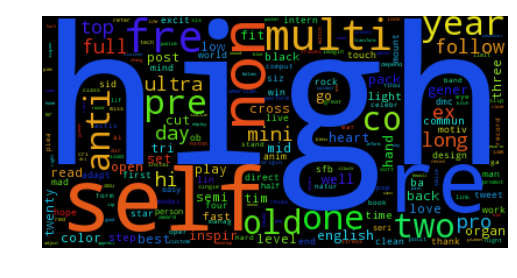

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word = " ".join(lemmatized_content)
wordcloud_raw = WordCloud().generate(word)
# Display the generated image
plt.figure()
plt.imshow(wordcloud_raw)
plt.axis("off")
plt.show()